In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# from src2.model import *

train = pd.read_csv('../data/train_dataset.csv')
test = pd.read_csv('../data/test_dataset.csv')
target = train['信用分']
data = pd.concat([train,test],axis=0,ignore_index=True)
data0 = data.copy()
data = data.fillna(0)

/home/wrj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


#### 1.处理数据 及 定义函数

##### 1.1 将“用户年龄”为0设置为缺失值

In [2]:
data.loc[data['用户年龄']==0, '用户年龄'] = None


##### 分析

In [3]:
def plot_fun(x):
    """
    data: 做了数据变换后的训练集数据
    data0: 原始训练集数据
    x: 做变换的特征
    目的： 比较做完变换的特征与变换之前的特征和y的关系图
    """
    d = data.iloc[0: 50000,:]
    d0 = data0.iloc[0:50000, :]
    fig = plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.scatter(d[x], d['信用分'])
    plt.xlabel("%s" % x)
    plt.title("预处理后的数据")
    plt.subplot(1,2,2)
    plt.scatter(d0[x], d0['信用分'])
    plt.xlabel("%s" % x)
    plt.title("原始数据")
    

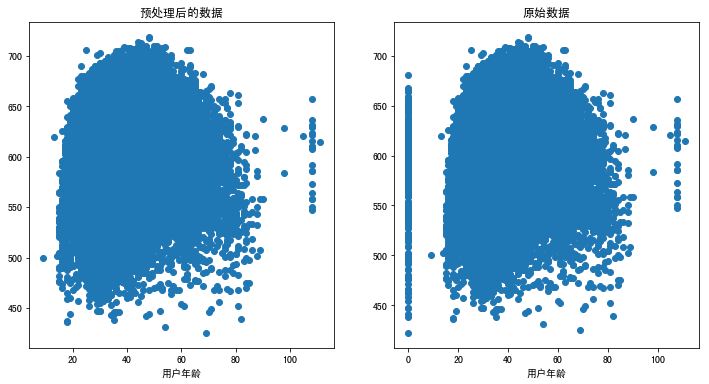

In [4]:
plot_fun('用户年龄')

##### 1.2用户话费敏感度：删除少数类别，视这部分数据为噪声，并用中位数来代替

In [16]:
data.loc[data['用户话费敏感度']==0, '用户话费敏感度'] = data['用户话费敏感度'].median()

In [18]:
data['用户话费敏感度'].value_counts()

4.0    29876
5.0    21011
2.0    20622
3.0    20578
1.0     7913
Name: 用户话费敏感度, dtype: int64

##### 分析

In [19]:
data0['用户话费敏感度'].value_counts()

4    29838
5    21011
2    20622
3    20578
1     7913
0       38
Name: 用户话费敏感度, dtype: int64

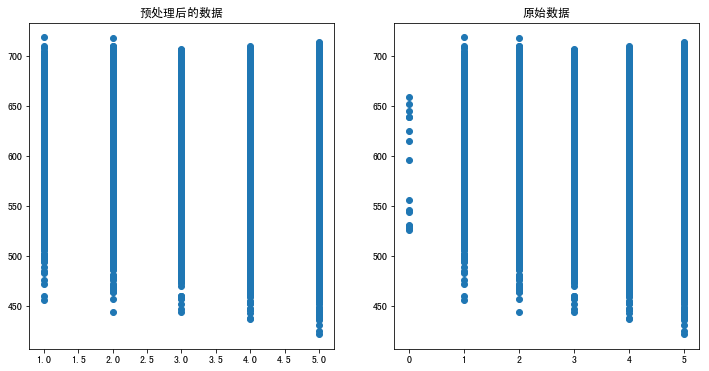

In [20]:
plot_fun('用户话费敏感度')

#### 1.3 feature_count

In [2]:
def feature_count(data, features):
    if len(set(data[features])) == len(data[features]):
        print('equal feature')
        return data
    new_feature = 'count'
    new_feature += '_' + i
    temp = data.groupby(features).size().reset_index().rename(columns={0: new_feature})
    data = data.merge(temp, 'left', on=features)
    return data

def endnumber(x):
    x_2_str = str(x)
    res = x_2_str.split(".")
    return int(res[-1])

def freq_coding(x, countdict):
    if (countdict[x] > 0) and (countdict[x] <= 50):
        return 0
    elif (countdict[x] > 50) and (countdict[x] <= 300):
        return 1
    else:
        return 2

def omit_value(x):
    if x <= 500:
        return 0
    elif (x>500) and (x<1000):
        return 1
    else:
        return 2

单一衍生：数据分布、频数编码、feature_count、endword、业务推导     
复合衍生：数据分布、业务推导

In [3]:
# class feature1(object):
#     def __init__(self, data):
#         self.name = 'feature1'
#         self.data = data
        
#     def single_distribution(self):
#         pass
    
#     def single_feature_count(self):
#         pass
    
#     def single_frequency_coding(self):
#         pass
    
#     def single_distribution(self):
#         pass
    
#     def composite_data(self):
#         pass
    
#     def composite_business(self):
#         pass

In [4]:
predictors = [i for i in data.columns if i not in ['用户编码','信用分','userno']]
predictors_category = ['用户实名制是否通过核实','是否大学生客户','是否黑名单客户','是否4G不健康客户',
                       '缴费用户当前是否欠费缴费','是否经常逛商场的人','当月是否逛过福州仓山万达',
                       '当月是否到过福州山姆会员店','当月是否看电影','当月是否景点游览','当月是否体育场馆消费',
                       '用户最近一次缴费距今时长（月）']
predictors_identity = ['用户年龄','近三个月月均商场出现次数']
predictors_consume = ['用户账单当月总费用（元）','缴费用户最近一次缴费金额（元）','用户近6个月平均消费值（元）',
                      '用户当月账户余额（元）','用户话费敏感度','当月通话交往圈人数','用户网龄（月）']
predictors_apps = ['当月网购类应用使用次数','当月物流快递类应用使用次数','当月金融理财类应用使用总次数',
                   '当月视频播放类应用使用次数','当月飞机类应用使用次数','当月火车类应用使用次数','当月旅游资讯类应用使用次数']
predictors_continues = list(set(predictors) - set(predictors_category))

In [28]:
class feature(object):
    def __init__(self, data, predictors):
        self.name = 'feature1'
        self.data = data
        self.indictors = predictors
        
    def single_distribution(self):
        data.loc[data['用户年龄']==0, '用户年龄'] = None
        data.loc[data['用户话费敏感度'] == 0, '用户话费敏感度'] = data['用户话费敏感度'].median()
        data['charge_type'] = 0
        data.loc[(data['缴费用户最近一次缴费金额（元）'] % 10 == 0) & (data['缴费用户最近一次缴费金额（元）'] != 0), \
                 'charge_type'] = 1

        return data['predictors']
    
    def single_feature_count(self):
        pass
    
    def single_frequency_coding(self):
        pass
    
    def single_distribution(self):
        pass
    
    def composite_data(self):
        pass
    
    def composite_business(self):
        pass
    


In [29]:
data.loc[data['用户话费敏感度'] == 0, '用户话费敏感度'] = data['用户话费敏感度'].median()

In [30]:
data['charge_type'] = 0
data.loc[(data['缴费用户最近一次缴费金额（元）'] % 10 == 0) & (data['缴费用户最近一次缴费金额（元）'] != 0), \
         '缴费用户最近一次缴费金额（元）'] = 1

In [31]:
d1 = feature(data, predictors)
dd1 = d1.single_distribution()

In [32]:
dd1

##### 2. 构造特征

In [18]:
data['charge_type'] = 0
data['charge_type'][(data['缴费用户最近一次缴费金额（元）'] % 10 == 0) & \
                    (data['缴费用户最近一次缴费金额（元）'] != 0)] = 1

/home/wrj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
def feature4(data):
    data['充值途径'] = 0
    data['充值途径'][(data['缴费用户最近一次缴费金额（元）'] % 10 == 0) & \
                       data['缴费用户最近一次缴费金额（元）'] != 0] = 1
    data['buy_rate'] = data['当月物流快递类应用使用次数'] / (data['当月网购类应用使用次数'] + 1)
    data['sixfee_nowfee'] = data['用户近6个月平均消费值（元）'] - data['用户账单当月总费用（元）']
    data['fivefee_nowfee'] = data['用户近6个月平均消费值（元）'] * 6 - data['用户账单当月总费用（元）']
    data['month'] = data['用户网龄（月）'].apply(lambda x: x % 12)
    data['year'] = data['用户网龄（月）'].apply(lambda x: x / 12)
    data['word1'] = data['用户账单当月总费用（元）'].apply(lambda x: endwords(x))
    features = ['缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）']
    for feature in features:
        data = feature_count(data, [feature])

    data['current_fee_stability'] = \
        data['用户账单当月总费用（元）'] / (data['用户近6个月平均消费值（元）'] + 5)

    data['use_left_rate'] = data['用户账单当月总费用（元）'] / (data['用户当月账户余额（元）'] + 5)

    data['payment_rate'] = data['用户账单当月总费用（元）'] / (data['缴费用户最近一次缴费金额（元）'] + 5)

    data['balance_6month_rate'] = data['用户当月账户余额（元）'] / (data['用户近6个月平均消费值（元）'] + 5)

    data['payment_6month_rate'] = data['缴费用户最近一次缴费金额（元）'] / (data['用户近6个月平均消费值（元）'] + 5)

    data['balance_payment_rate'] = data['用户当月账户余额（元）'] / (data['缴费用户最近一次缴费金额（元）'] + 5)

    data['当月金融理财类应用使用总次数/all'] = \
        data['当月金融理财类应用使用总次数'] / (data['当月网购类应用使用次数'] + data['当月物流快递类应用使用次数'] + \
                                  data['当月旅游资讯类应用使用次数'] + data['当月飞机类应用使用次数'] + \
                                  data['近三个月月均商场出现次数'] / 3 + data['当月火车类应用使用次数'] + \
                                  data['当月视频播放类应用使用次数'])  # 还ok点

    data['当月视频播放类应用使用次数/all'] = \
        data['当月视频播放类应用使用次数'] / (data['当月网购类应用使用次数'] + data['当月物流快递类应用使用次数'] + \
                                 data['当月旅游资讯类应用使用次数'] + data['当月飞机类应用使用次数'] + \
                                 data['近三个月月均商场出现次数'] / 3 + data['当月火车类应用使用次数'] + \
                                 data['当月金融理财类应用使用总次数'])

    data['当月网购类应用使用次数/all'] = \
        data['当月网购类应用使用次数'] / (data['当月视频播放类应用使用次数'] + data['当月物流快递类应用使用次数'] + \
                               data['当月旅游资讯类应用使用次数'] + data['当月飞机类应用使用次数'] + \
                               data['近三个月月均商场出现次数'] / 3 + data['当月火车类应用使用次数'] + \
                               data['当月金融理财类应用使用总次数'])

    data['当月飞机类应用使用次数'] = \
        data['当月飞机类应用使用次数'] / (data['当月视频播放类应用使用次数'] + data['当月物流快递类应用使用次数'] + \
                               data['当月网购类应用使用次数'] + data['当月旅游资讯类应用使用次数'] + \
                               data['近三个月月均商场出现次数'] / 3 + data['当月火车类应用使用次数'] + \
                               data['当月金融理财类应用使用总次数'])
    data.drop(columns=['是否大学生客户', '是否黑名单客户', '当月是否到过福州山姆会员店', '当月是否逛过福州仓山万达', '是否经常逛商场的人'], inplace=True)
    return data


##### 分析

In [ ]:

def feature5(data):
    data['充值途径'] = 0
    data['充值途径'][(data['缴费用户最近一次缴费金额（元）'] % 10 == 0) & \
                       data['缴费用户最近一次缴费金额（元）'] != 0] = 1
    data['buy_rate'] = data['当月物流快递类应用使用次数'] / (data['当月网购类应用使用次数'] + 1)
    data['sixfee_nowfee'] = data.apply(lambda x: x['用户近6个月平均消费值（元）'] - x['用户账单当月总费用（元）'], axis=1)
    data['cz_times'] = (data['用户账单当月总费用（元）']) / (data['缴费用户最近一次缴费金额（元）'] + 1)
    data['fivefee_nowfee'] = data['用户近6个月平均消费值（元）'] * 6 - data['用户账单当月总费用（元）']
    data['month'] = data['用户网龄（月）'].apply(lambda x: x % 12)
    data['year'] = data['用户网龄（月）'].apply(lambda x: x / 12)

    data['word1'] = data['用户账单当月总费用（元）'].apply(lambda x: endwords(x))
    data['word2'] = data['缴费用户最近一次缴费金额（元）'].apply(lambda x: endwords(x))
    data['word3'] = data['用户近6个月平均消费值（元）'].apply(lambda x: endwords(x))
    features = ['缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）']
    data = feature_count(data, features)
    countdict = dict(data['用户账单当月总费用（元）'].value_counts())
    data['set_fee'] = data['用户账单当月总费用（元）'].apply(lambda x: trans_set(x, countdict))
    data['shopping_level'] = data['当月是否逛过福州仓山万达'] + data['当月是否到过福州山姆会员店'] + data['当月是否看电影'] + data['当月是否景点游览'] + data[
        '当月是否体育场馆消费']
    data['当月网购类应用使用次数/all'] = \
        data['当月网购类应用使用次数'] / (data['当月视频播放类应用使用次数'] + data['当月物流快递类应用使用次数'] + \
                               data['当月旅游资讯类应用使用次数'] + data['当月飞机类应用使用次数'] + data['当月火车类应用使用次数'] + \
                               data['当月金融理财类应用使用总次数'])

    data['当月交通类应用使用次数/all'] = \
        (data['当月飞机类应用使用次数'] + data['当月火车类应用使用次数']) / (data['当月视频播放类应用使用次数'] + data['当月物流快递类应用使用次数'] + \
                                                       data['当月网购类应用使用次数'] + data['当月旅游资讯类应用使用次数'] +
                                                       data['当月金融理财类应用使用总次数'])
    data.drop(columns=['是否大学生客户', '是否黑名单客户', '当月是否到过福州山姆会员店', '当月是否逛过福州仓山万达', '是否经常逛商场的人'], inplace=True)
    return data

def feature6(data):
    data['充值途径'] = 0
    data['充值途径'][(data['缴费用户最近一次缴费金额（元）'] % 10 == 0) & \
                       data['缴费用户最近一次缴费金额（元）'] != 0] = 1
    data['buy_rate'] = data['当月物流快递类应用使用次数'] / (data['当月网购类应用使用次数'] + 1)
    data['sixfee_nowfee'] = data.apply(lambda x: x['用户近6个月平均消费值（元）'] - x['用户账单当月总费用（元）'], axis=1)
    data['cz_times'] = (data['用户账单当月总费用（元）']) / (data['缴费用户最近一次缴费金额（元）'] + 1)
    data['fivefee_nowfee'] = data['用户近6个月平均消费值（元）'] * 6 - data['用户账单当月总费用（元）']
    data['month'] = data['用户网龄（月）'].apply(lambda x: x % 12)
    data['year'] = data['用户网龄（月）'].apply(lambda x: x / 12)
    data['word1'] = data['用户账单当月总费用（元）'].apply(lambda x: endwords(x))
    data['word2'] = data['缴费用户最近一次缴费金额（元）'].apply(lambda x: endwords(x))
    data['word3'] = data['用户近6个月平均消费值（元）'].apply(lambda x: endwords(x))
    features = ['缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）']
    data = feature_count(data, features)
    countdict = dict(data['用户账单当月总费用（元）'].value_counts())
    data['set_fee'] = data['用户账单当月总费用（元）'].apply(lambda x: trans_set(x, countdict))
    data['shopping_level'] = data['当月是否逛过福州仓山万达'] + data['当月是否到过福州山姆会员店'] + data['当月是否看电影'] + data['当月是否景点游览'] + data[
        '当月是否体育场馆消费']
    data['当月网购类应用使用次数/all'] = \
        data['当月网购类应用使用次数'] / (data['当月视频播放类应用使用次数'] + data['当月物流快递类应用使用次数'] + \
                               data['当月旅游资讯类应用使用次数'] + data['当月飞机类应用使用次数'] + data['当月火车类应用使用次数'] + \
                               data['当月金融理财类应用使用总次数'])
    data['当月交通类应用使用次数/all'] = \
        (data['当月飞机类应用使用次数'] + data['当月火车类应用使用次数']) / (data['当月视频播放类应用使用次数'] + data['当月物流快递类应用使用次数'] + \
                                                       data['当月网购类应用使用次数'] + data['当月旅游资讯类应用使用次数'] +
                                                       data['当月金融理财类应用使用总次数'])
    data.drop(columns=['是否大学生客户', '是否黑名单客户', '当月是否到过福州山姆会员店', '当月是否逛过福州仓山万达', '是否经常逛商场的人'], inplace=True)
    return data
